### In this notebook one applies Lagorce et al. 2017 method to the NMNIST dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
from Network import network, histoscore

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

# Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [3]:
hots = network(krnlinit='first', tau=1, homeo=False, timestr='2021-02-16')
hots = hots.learning1by1()

no jitter


100%|██████████| 20/20 [00:44<00:00,  2.23s/it]


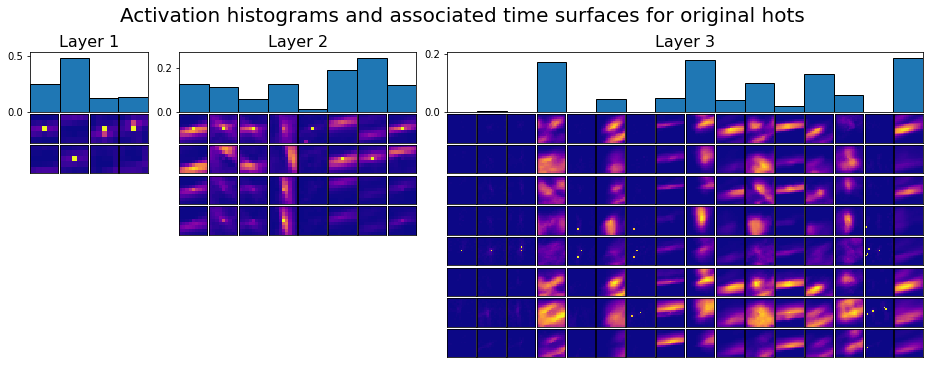

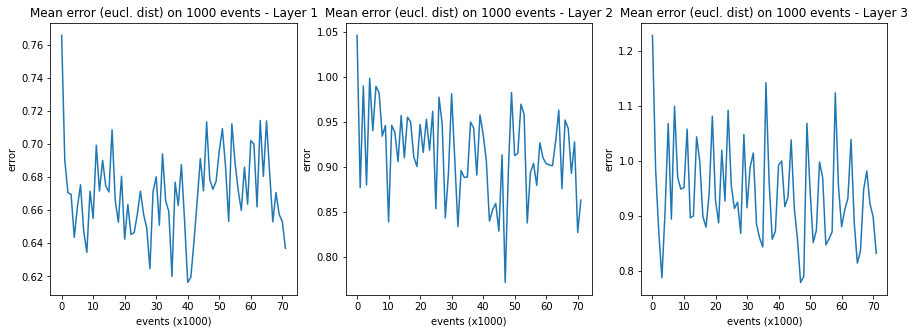

In [4]:
hots.plotlayer()
hots.plotconv()

In [5]:
trainmap = hots.running(nb_digit=4500)
testmap  = hots.running(train=False, nb_digit=50)

../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_4500_[None, None]_histo.pkl
no jitter


100%|██████████| 4500/4500 [3:09:43<00:00,  2.53s/it]  


../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_50_[None, None]_histo.pkl
no jitter


100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


In [6]:
histoscore(trainmap,testmap)

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 60.0% - eucli = 64.0% - norm = 64.0%
Classification scores with entropy: Kullback-Leibler = 64.0% - Jensen-Shannon = 60.0%
----------------------------------------------------------------------------------------------------


0.6

## Adding Homeostasis

In [7]:
homhots = network(krnlinit='first', tau=1, homeo=True, timestr='2021-02-16')
homhots = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

no jitter


100%|██████████| 20/20 [01:36<00:00,  4.82s/it]


PicklingError: Can't pickle <class 'Network.network'>: it's not the same object as Network.network

In [ ]:
trainmaphom = homhots.running(homeotest=True, nb_digit = 4500)
testmaphom = homhots.running(homeotest=True, train = False)
histoscore(trainmaphom,testmaphom)

../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_4500_[None, None]_homeo_histo.pkl
no jitter


  1%|          | 29/4500 [01:58<5:05:39,  4.10s/it]

### Classification without homeostasis

In [ ]:
trainmaphom  = homhots.running(nb_digit = 4500)
testmaphom  = homhots.running(train = False)
histoscore(trainmaphom,testmaphom)

# Random initialisation of the kernels

In [ ]:
hots = network(krnlinit='rdn', tau=5, homeo = True, timestr='2021-02-16')
hots = hots.learningall()
hots.plotlayer()
hots.plotconv()

In [ ]:
hots = network(krnlinit='rdn', tau=1, timestr='2021-02-16')
hots = hots.learningall()
hots.plotlayer();

In [ ]:
trainmap = hots.running(nb_digit = 4500)

In [ ]:
testmap = hots.running(train = False)
histoscore(trainmap,testmap)

## Adding Homeostasis

In [ ]:
homhots = network(krnlinit='rdn', tau=5, homeo=True, timestr='2021-02-16')
homhots = homhots.learningall()
homhots.plotlayer()
homhots.plotconv()

In [ ]:
trainmaphom = homhots.running(homeotest = True, nb_digit = 4500)
testmaphom = homhots.running(train = False, homeotest=True)
histoscore(trainmaphom,testmaphom)

### Classification without homeostasis

In [ ]:
trainmaphom2  = homhots.running()
testmaphom2  = homhots.running(train = False)
histoscore(trainmaphom2,testmaphom2)